<a href="https://colab.research.google.com/github/janetjayr/Data-analysis-/blob/main/Road_Accidenanalysis_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Road Accidents in the UK between 2009-2017
The data used was on road accidents that have been recorded from 2009-2017in   U.K. This data was from data.gov.uk and it consists of 23368 rows and 12 columns.This data is used to analyze different causes of accidents  and identify the ones that we can control and hence try and prevent more accidents.

### Analysis Questions
#### I have formulated problem questions for a better guide. Each question will be broken down further to smaller questions.
1.When do accidents usualy happen-time, day, month and year.

2.Under what conditions do most accidents occur.  
3.What is the characteristics of the Casualties.

Imported libraries

In [ ]:
import pandas as pd
import numpy as np

import math
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
from matplotlib.colors import ListedColormap

### <font color='blue'> 1.**Load the road accident data from csv file**</font>

In [ ]:
path="/content/drive/MyDrive/9yrs.csv"

The data below is data on road accidents that have occured from 2009 to 2017. It consists of many variables describing the accidents cause and casualties characteristics. Some of the variables are gender,age, casualty severity, road surface, lightining conditions among others.

In [ ]:
data=pd.read_csv(path,encoding='cp1252')
data.head()

,Number of Vehicles,Accident Date,accident_time,1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,1,1/1/2009,12:55:00 AM,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car
1,1,1/2/2009,11:35:00 PM,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car
2,1,1/2/2009,4:45:00 PM,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car
3,1,1/2/2009,5:23:00 PM,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car
4,2,1/2/2009,1:50:00 PM,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car


### <font color='blue'> **2.Clean Data**</font> .

I initial  combined data from different years(2009-2017) using pivot tables and then cleaned the data in excel where I dropped some columns like longitude and latitude as they were irrevelant to my anlysis since it was UK data. 
Here I checked for Nan values and found that only two rows had them and dropped the two Nan values. I renamed some columns for the purpose of simplicity and avoiding errors while coding.
I further dropped three coulmns as they would not be significant to my analysis, for example in the type of vehicle column the vehicles were not well specified according to brand but rather genralized as car.



In [ ]:
nandf=data[data.isna().any(axis=1)]
data=data.dropna(how='all')
data.rename(columns={'Age of Casualty':'Age','Sex of Casualty':'Gender'},inplace=True)
data=data.drop(columns=['Number of Vehicles','Type of Vehicle','1st Road Class'])
data.head()

,Accident Date,accident_time,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Gender,Age
0,1/1/2009,12:55:00 AM,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44
1,1/2/2009,11:35:00 PM,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23
2,1/2/2009,4:45:00 PM,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12
3,1/2/2009,5:23:00 PM,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15
4,1/2/2009,1:50:00 PM,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34


 <font color='blue'>**2b.Feature transformation**</font> .
 
Used the timestamp feature to derive more columns like day, month and year.
Added another hour column.

In [ ]:
data['Accident Date']=pd.to_datetime(data['Accident Date'])
data['year'] = pd.DatetimeIndex(data['Accident Date']).year
data['month'] = pd.DatetimeIndex(data['Accident Date']).month
data['month'] = data['month'].apply(lambda x: calendar.month_abbr[x])
data['day']=data['Accident Date'].dt.day_name()
data['accident_time'] = pd.to_datetime(data['accident_time'], format='%I:%M:%S %p').dt.strftime('%H:%M:%S')
data['Hour'] = data.apply(lambda x: str(x.accident_time).split(':')[0], axis=1)
#data=data.drop(columns=['Accident Date'])
data

,Accident Date,accident_time,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Gender,Age,year,month,day,Hour
0,2009-01-01,00:55:00,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,2009,Jan,Thursday,00
1,2009-01-02,23:35:00,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,2009,Jan,Friday,23
2,2009-01-02,16:45:00,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,2009,Jan,Friday,16
3,2009-01-02,17:23:00,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,2009,Jan,Friday,17
4,2009-01-02,13:50:00,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,2009,Jan,Friday,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23633,2017-12-31,15:15:00,Snow,Daylight: Street lights present,Snowing without high winds,Vehicle or pillion passenger,Slight,Male,21,2017,Dec,Sunday,15
23634,2017-12-31,19:35:00,Wet/Damp,Darkness: Street lights present and lit,Raining without high winds,Driver,Slight,Male,23,2017,Dec,Sunday,19
23635,2017-12-31,21:11:00,Wet/Damp,Darkness: Street lights present and lit,Raining without high winds,Driver,Slight,Male,20,2017,Dec,Sunday,21
23636,2017-01-11,23:20:00,Wet/Damp,Darkness: Street lights present and lit,Fine without high winds,Driver,Serious,Male,34,2017,Jan,Wednesday,23


## 3. <font color='blue'> **Data analysis**</font> 


## <font color='blue'>1. **When** **do** **accidents** **ussually** **happen**</font> .

### <font color='green'>1a.Accidents distribution per month</font> 

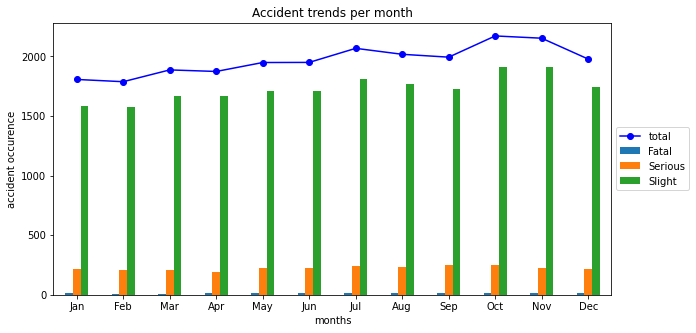

In [ ]:
#fig=plt.figure(figsize=(10,5))
#ax1=plt.subplot(1,1,1)
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

accident_month=data.groupby(['month']).agg({'Casualty Severity':"value_counts"}).unstack(fill_value=0)
accident_month.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x])).plot(kind='bar',figsize=(10,5), xlabel='months',ylabel='accident occurence',
                                                                                              title= 'Accident trends per month')
totalaccidents=data['month'].value_counts()
month_names = calendar.month_abbr[1:]
totalaccidents = totalaccidents.reindex(month_names, fill_value=True)
totalaccidents.plot(color = 'b', linestyle = 'solid', marker = 'o', label = "total")
plt.legend(['total','Fatal','Serious','Slight'],
          loc='center left',bbox_to_anchor=(1,0.5))

The graph above shows the distribution and severity of accidents in different months from 2009-2017. We can see that slight accidents are the most accidents.Generaly february has the least accidents as it is around the winter season.There is a slight increase in March  due to the fact that winter is coming to an end and spring is approaching.We can see an increase in July  because of the summer season. One article highligted some driving risks to be aware of during the summer season, such as longer driving journey and distracted drivers due to the fact that schools are closed  and families are headed for the holiday.(https://www.ageas.co.uk/solved/your-car/beware-these-8-summer-driving-risks/ ) 
October and november accounts for the most accidents  due to the risk of 'dazzling sun', reduced day time, wet roads and leaves debris causing  slippery road conditions during the autumn season. A deacrease  is seen as we approach December the winter season.




### <font color='green'>1b.Accidents heat map according to day and hour
</font> 




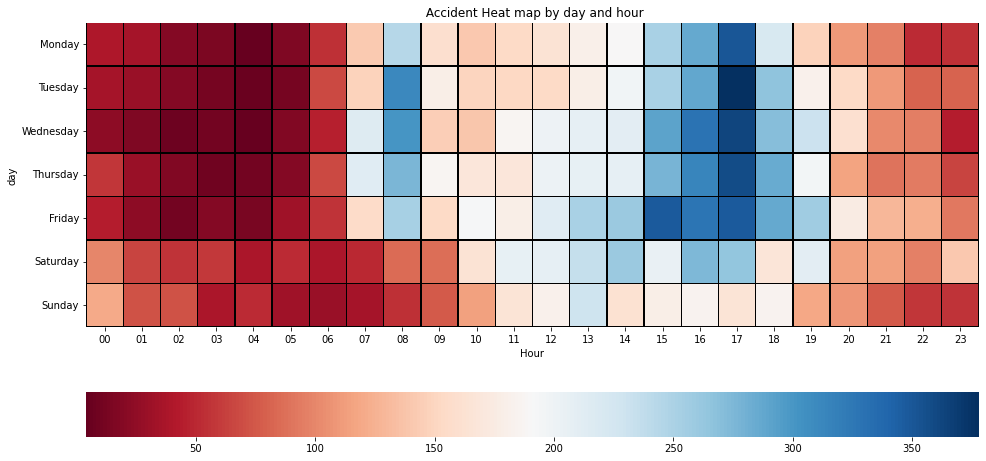

In [ ]:
#heatmap=data.day.groupby([data.Hour]).value_counts().unstack()
#heatmap=data.groupby('Hour').day.value_counts().unstack()
heatmap=data.groupby('day').Hour.value_counts().unstack()
plt.figure(figsize=(16,8))
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap=heatmap.reindex(day_of_week)

#plt.xlabel('Hour', size = 15)
#plt.ylabel('day', size = 15)
plt.title(' Accident Heat map by day and hour')
heatmap 
           
sns.heatmap(heatmap,cmap='RdBu',cbar_kws = ({"orientation": "horizontal"}),
            linewidth=0.5,linecolor='black')


From the heatmap above ,From Monday to Thursday between 7am and 8am and 3pm and 6pm which are  rush hours, there are many accidents occuring at that time as most people are heading to and from work or school. As even head of Motor at Admiral, Sabine Williams, said: "*Rush hour means higher volumes of traffic and more stressed drivers on the road, and as our data clearly shows, these result in more accidents".*
on Friday the increase in accidents begin quite early that is at 3pm, mostly because people are speeding home from work getting ready for the weekend. 
Sunday is the safest day as most people are at home relaxing.

### <font color='green'>1c. Accidents distribution over the last 9years.
</font> 


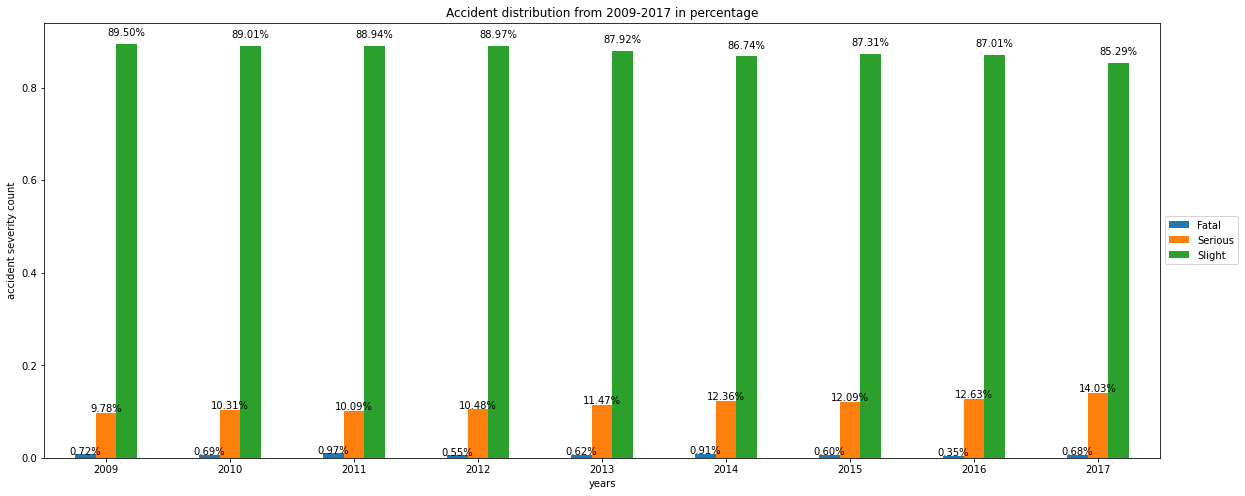

In [ ]:
data.rename(columns={'Casualty Severity':'Severity'},inplace=True)
accidentyear=data.groupby('year').Severity.value_counts().unstack()
dfp=accidentyear.div(accidentyear.sum(1), axis=0)
p1 = dfp.plot(kind='bar', figsize=(20, 8), rot=0, ylabel='Percentage', title="Accident distribution from 2009-2017 in percentage")

 
for p in p1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    p1.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')
                   

plt.xlabel('years')
plt.ylabel('accident severity count')
plt.legend(['Fatal','Serious','Slight'],loc='center left',bbox_to_anchor=(1,0.5))



This graph analyzes accident occurences for the past 9years. In general we can see that slight accidents is the most frequent type of accidents. 2009 had the most accidents then a slight decrease in the subsequent year which might indicate some little imporvement. Serious injuries tend to increase subsequently from 2009-2017.


## <font color='blue'>**2. Under what conitions do most accidents occur**.</font> .

In this datasets we have many conditions that have caused road accidents like the weather, roadsurface,lighting conditions....

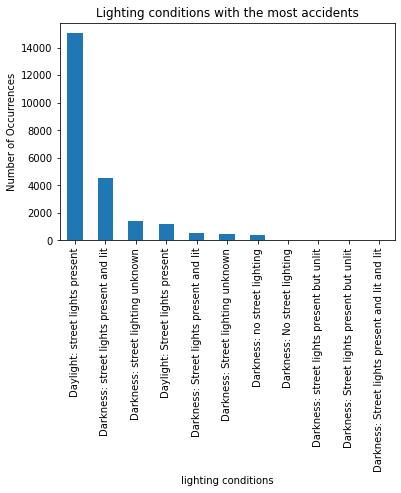

In [ ]:

light  = data['Lighting Conditions'].value_counts().plot(kind='bar',
                                                        title='Lighting conditions with the most accidents',
                                                        ylabel='Number of Occurrences',
                                                        xlabel='lighting conditions')
plt.show()

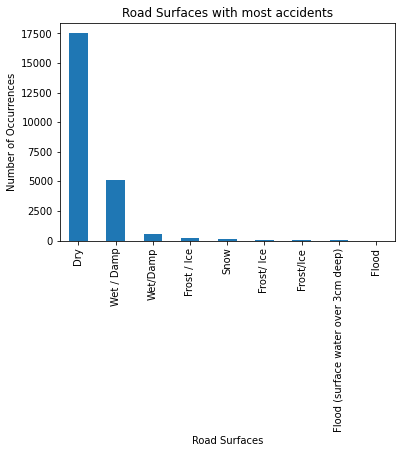

In [ ]:
surface  = data['Road Surface'].value_counts().plot(kind='bar',
                                                        title='Road Surfaces with most accidents',
                                                        ylabel='Number of Occurrences',
                                                        xlabel='Road Surfaces')

plt.show()

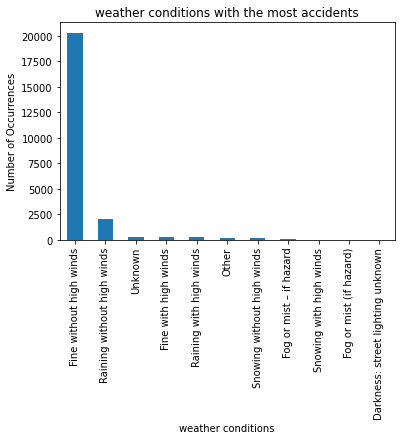

In [ ]:
weathercondition  = data['Weather Conditions'].value_counts().plot(kind='bar',
                                                        title='weather conditions with the most accidents',
                                                        ylabel='Number of Occurrences',
                                                        xlabel='weather conditions')


From the three graphs above we can see that the results are not surprising. Most accidents occur when the road surface is dry, lighting conditions are good i.e daylight and when the weather conditions are fine. 

#<font color='blue'> **3. What is the Characteristics of the Casualties involved in accidents**.</font> 
To be able to conduct road safety campains it is important to know our target audience. We are going to look at the most affected or involved people in accidents, their age and the gender of the Casualties.

## <font color='green'>3a.Class of Cassualties.</font> 
<font color='green'>i.Who are most people involved in accidents.</font> 

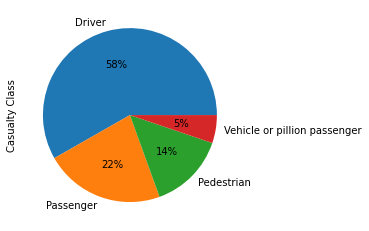

In [ ]:
classofcasualties=data["Casualty Class"].value_counts()
classofcasualties.plot(kind="pie",autopct='%1.0f%%')

The piechart above tells us about the class of people in accidents. From that we can see that drivers are the most impacted or involved people during accidents.

## <font color='green'>3b.What  age are most people involved in accidents.</font> 
### 1.add an age-group column.

In [ ]:
data['Age Group'] = pd.cut(data['Age'], 
   [0, 15,20,25,35,40,45,60 ,65, 100],
    labels=['0-15 ', '15-20 ', '20-25','25-30','30-35','35-40','40-45','45-60','65+ ']
)
data.head()

,Accident Date,accident_time,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Severity,Gender,Age,year,month,day,Hour,Age Group
0,2009-01-01,00:55:00,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,2009,Jan,Thursday,00,35-40
1,2009-01-02,23:35:00,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,2009,Jan,Friday,23,20-25
2,2009-01-02,16:45:00,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,2009,Jan,Friday,16,0-15
3,2009-01-02,17:23:00,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,2009,Jan,Friday,17,0-15
4,2009-01-02,13:50:00,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,2009,Jan,Friday,13,25-30


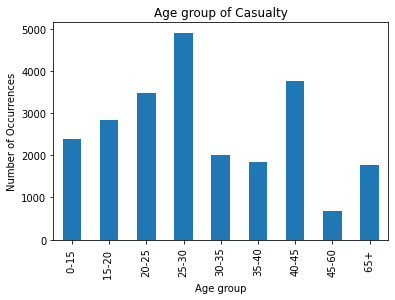

In [ ]:
agegroup=['0-15 ', '15-20 ', '20-25','25-30','30-35','35-40','40-45','45-60','65+ ']
age = data['Age Group'].value_counts().sort_index()
age.plot(kind='bar',x='Age Group',
                     title='Age group of Casualty',
                     ylabel='Number of Occurrences',
                      xlabel='Age group'
                                            
                                                    
)
plt.show()

From the graph above we can see that most people between the age of 25-30 are involved in accidents. There is a slight increase between the ages of 40-45. In the next graph we look at the casualty class(passengers, drivers .) and their ages to know who are involved or cause most accidents. There is a high number if children between the ages of 0-15 years affected by the road accidents.


## <font color='green'> ii. What is the age distribution of the Casualties.</font> 

Text(0, 0.5, 'accident occurence')

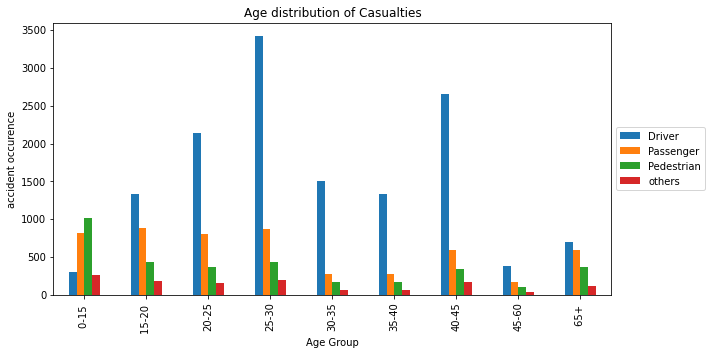

In [ ]:
age=data.groupby(['Age Group']).agg({'Casualty Class': "value_counts"}).unstack(fill_value=0).plot(kind='bar',figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(['Driver', 'Passenger', 'Pedestrian','others'],
           loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Age distribution of Casualties')
plt.ylabel('accident occurence')

From the pie chart above we saw that drivers are the most impacted people. Drivers between the age of 20-30 years are most involved in accidents and also strange occurences between the ages of 40-45. To be able to offer and target road safety effectively this age groups are the ones to be targeted. Children(pedestrians) also between the ages of 0-15  are impacted by accidents. 

## <font color='green'>3c. Age and gender of drivers.</font> 

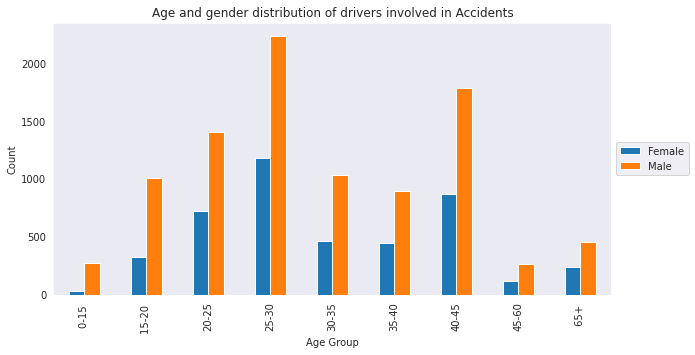

In [ ]:
agzz=data[data['Casualty Class']== 'Driver']
agzs=agzz[['Age Group','Gender']].value_counts().unstack(fill_value=False)

sns.set_style('dark')
agzs.plot(kind='bar',
          ylabel='Count',
          title='Age and gender distribution of drivers involved in Accidents',
          figsize=(10,5))

plt.legend(loc='center left',bbox_to_anchor=(1,0.5))


The graph above shows the age and gender distribution of drivers involved in accidents. Male drivers around the age of 20-30 are most involved in accidents. There is a slight increase  in male drivers in the age 40-45 who are also involved in accidents. The number of female drivers is not that high but there is an increase in occurence for those in 25-30years of age compared to the other ages.

**CONCLUSION**

## CONCLUSION

The project analyzed various parameters on accident occurences.We can summarise our findings as follows;

1.Accidents are caused by common factors known to most of us: some of these are accidents tend to occur when the road surface is dry, weather is fine and lighting is great. people lower their guard when the conditions are favourable and in turn cause or get involved in accidents.

2.The male drivers between the age 0f 20-30 years are responsible for a great percentage of accidents caused.

3.Children(pedestrians) between the age of 0-15 are greatly affected by this accidents.

4.Acidents also tend to occur  during rush hours 6am-9am and 3pm and 6pm as people are heading to and from work or school. On Fridays too in the afternoon as people are rushing to go home or enjoy themselves as the weekend approaches.

## **Recommendation**

1.Have more police during rush hours and  Friday eveneing to control traffic.

2.Offer a Pedestrians guide for children to assist them in crossing the roads.

3. Apart from taking fines from arrested drivers, make refresher classes mandatory for them

## **Further** **Studies**
1.Get more data to show the condition of drivers when they are driving that led to the acident and get to understand why men of a certain age are involved in alot of accidents.

In [ ]:
T